In [1]:
%%html
<html lang="en">
  <head>
    <meta charset="UTF-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
    <meta name="description" content="Glassmorphism" />
    <meta
      name="keywords"
      content="glassmorphism, UIUX"
    />
    <meta name="author" content="emmaccen" />
    <title>Glass Morphism</title>
    <style>
      html {
        height: 100%;
      }
      body {
        margin: 0;
        padding: 0;
      }

      * {
        box-sizing: border-box;
      }

      .landingContainer {
        /* span the entire desktop height : height: 100vh;*/
        height: 100%;
        font-family: consolas !important;
        /* set a gradient background with 3 colours https://coolors.co/ */
        background: linear-gradient(
          to right,
          #280b53,
          #65156e,
          #9f2a63,
          #d44842
        );
        display: flex;
        flex-direction: column;
        align-items: center;
        justify-content: space-around;
      }

      .centered {
        /* center content */
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        /* so it takes up its containers height (landingContainer)*/
        height: inherit;
      }

      h1.title {
        color: whitesmoke;
        font-family: georgia;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 6vw;
        text-align: center;
        margin-bottom: 0;
        margin-top: 20px;
      }

      h2.title {
        color: whitesmoke;
        font-family: consolas;
        /* cover the entire page width : font-size: 10vw;*/
        font-size: 1.5vw;
        margin-bottom: 16px;
        margin-top: 0;
        margin-left: 0;
      }
      /* The real deal  starts here*/
      .glassContainer {
        position: absolute;
        /* center content */
        display: flex;
        justify-content: center;
        align-items: center;
        top: 0;
        width: 100%;
        height: 100%;
      }
      .cover {
        transition: 0.5s all ease;
        height: 70%;
        width: 70%;
        background-color: rgba(255, 255, 255, 0.25);
        /* box-shadow: none|h-offset v-offset blur spread color |inset|initial|inherit; */
        box-shadow: 0 8px 32px 0 rgba(31, 38, 135, 0.37);
        /* For the fog-like glass effect */
        backdrop-filter: blur(4px);
        -webkit-backdrop-filter: blur(4px);
        border-radius: 10px;
      }

      /* responsiveness */

      @media (max-width: 700px) {
        .cover {
          height: 30%;
        }
      }
    </style>
  </head>
  <body>
    <div class="landingContainer">
      <div class="centered">
        <h1 class="title">PREDICTIVE MAINTENANCE</h1>
        <h2 class="title">IN CNC MACHINE</h2>
      </div>
    </div>
  </body>
</html>

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("predictive_maintenance.csv")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [6]:
data["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [7]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
data.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [9]:
col_failure_type = data['Failure Type'].unique()
col_failure_type

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [10]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [11]:
dat_n = data.copy()
tr_failure = dat_n[dat_n['Target'] == 1]
tr_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [12]:
tar_counts=dat_n['Target'].value_counts()
tar_counts

0    9661
1     339
Name: Target, dtype: int64

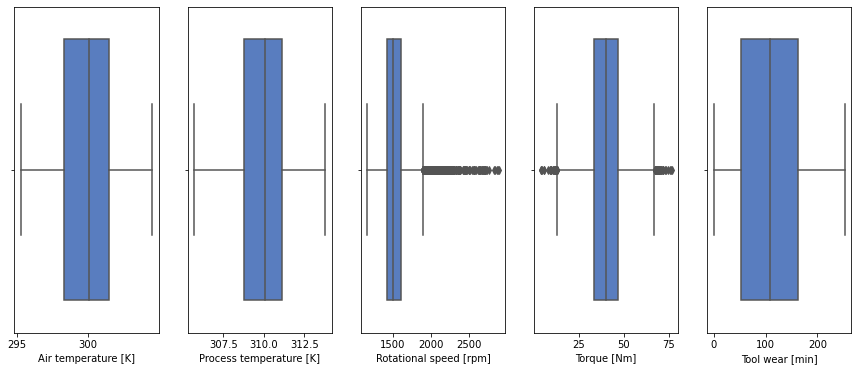

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(15, 6))
list1 = ["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]"]
j=0
for i in list1:
        sb.boxplot(ax=axes[j], data=dat_n, x=i,palette="muted")
        j += 1

In [15]:
dat_n['Temp_diff']=dat_n['Process temperature [K]']-dat_n['Air temperature [K]']

In [16]:
dat_n

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temp_diff
0,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5
1,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5
2,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4
3,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4
4,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5
...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure,9.6
9996,H,298.9,308.4,1632,31.8,17,0,No Failure,9.5
9997,M,299.0,308.6,1645,33.4,22,0,No Failure,9.6
9998,H,299.0,308.7,1408,48.5,25,0,No Failure,9.7


In [17]:
dt_pass=dat_n[dat_n['Target']==0]
dt_fail=dat_n[dat_n['Target']==1]

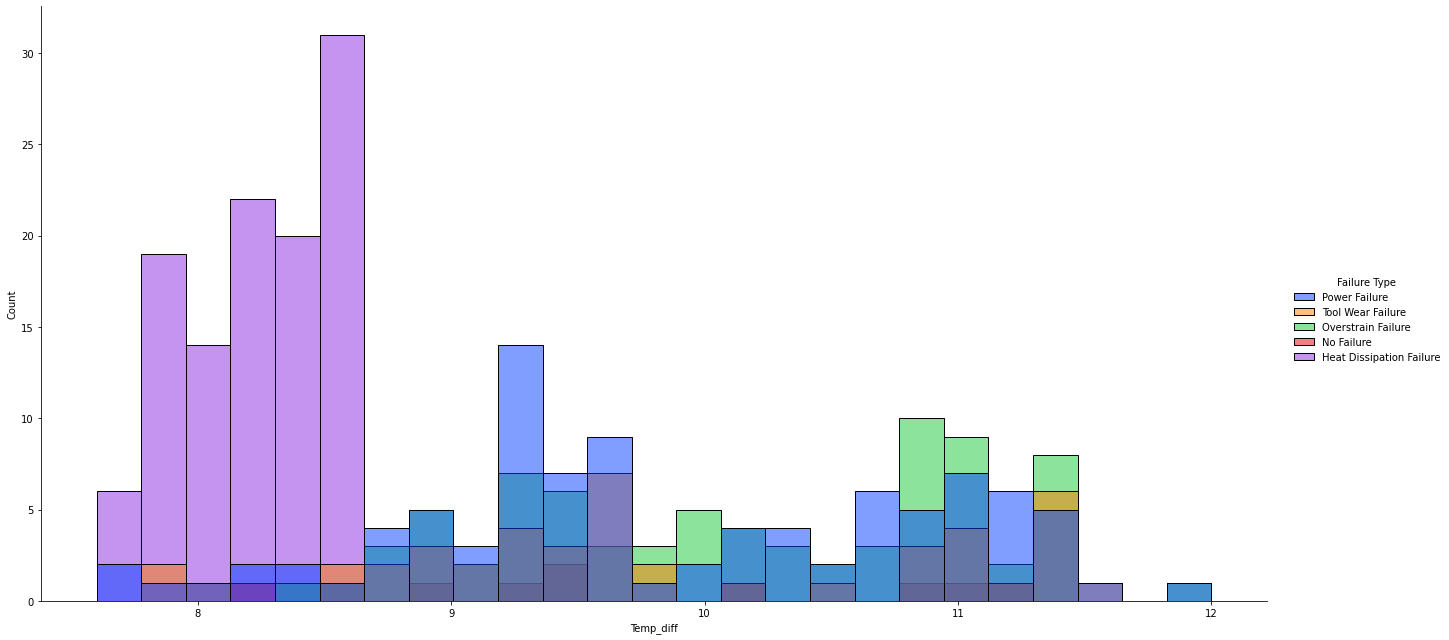

In [18]:
sb.displot(data=dt_fail, x="Temp_diff", hue="Failure Type", kde=False, bins = 25,height = 9, aspect =2,palette="bright")

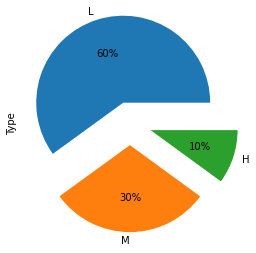

In [19]:
x=dat_n['Type'].value_counts().plot.pie(explode=[0.25,0.25,0.25],autopct='%1.0f%%')

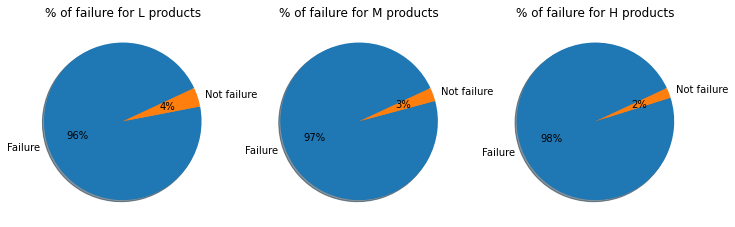

In [20]:
fig, axes = plt.subplots(1,3, figsize=[12,7])
j=0
for i in ["L","M","H"]:
    data_product_type = dat_n[dat_n['Type'] == i]
    axes[j].pie(data_product_type['Target'].value_counts(), labels=['Failure', 'Not failure'],
                autopct='%1.0f%%', shadow=True, startangle=25)
    axes[j].set_title('% of failure for ' + str(i) + ' products')
    j+=1

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

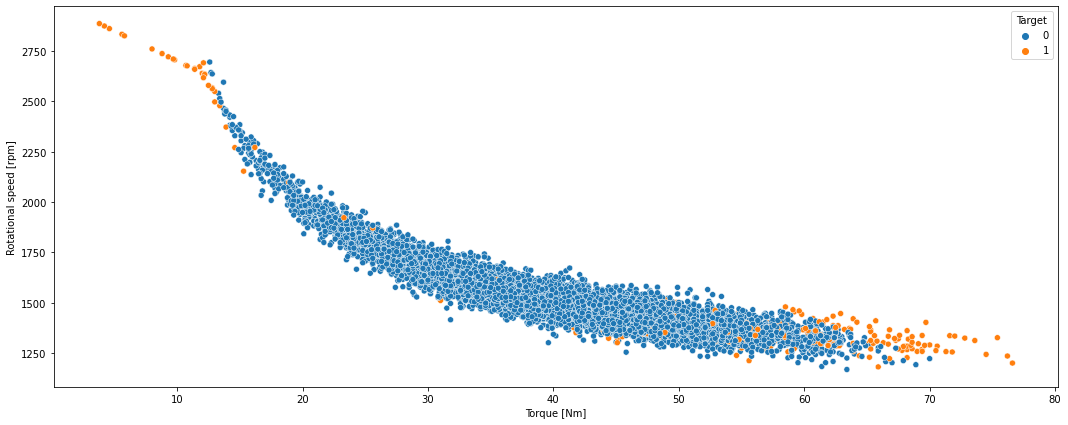

In [21]:
plt.figure(figsize=(18,7))
sb.scatterplot(data=dat_n, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10")

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

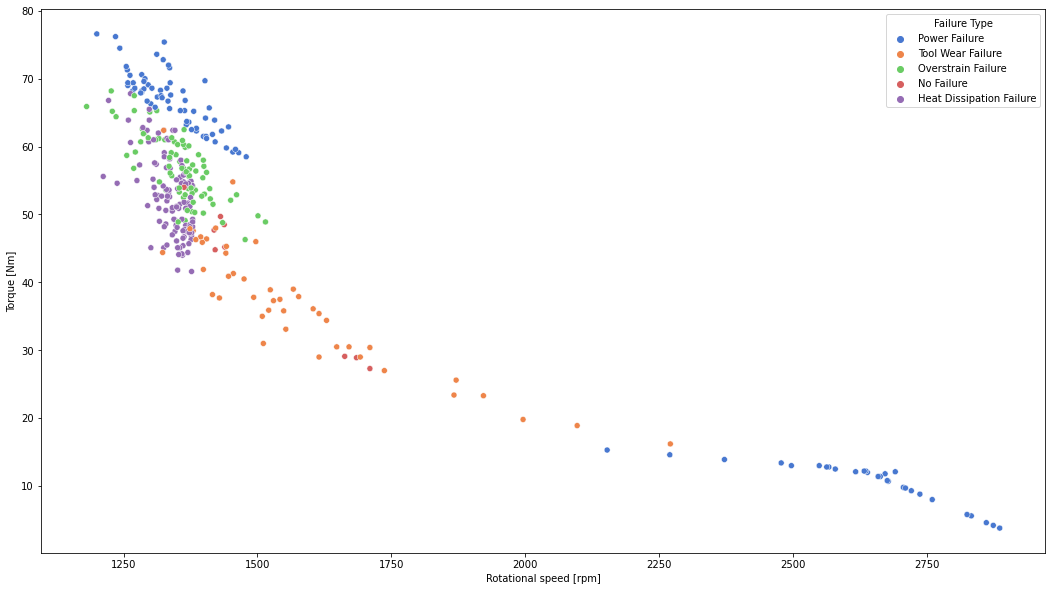

In [22]:
plt.figure(figsize=(18,10))
sb.scatterplot(data=dt_fail,x="Rotational speed [rpm]",y='Torque [Nm]',hue="Failure Type",palette = "muted")

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

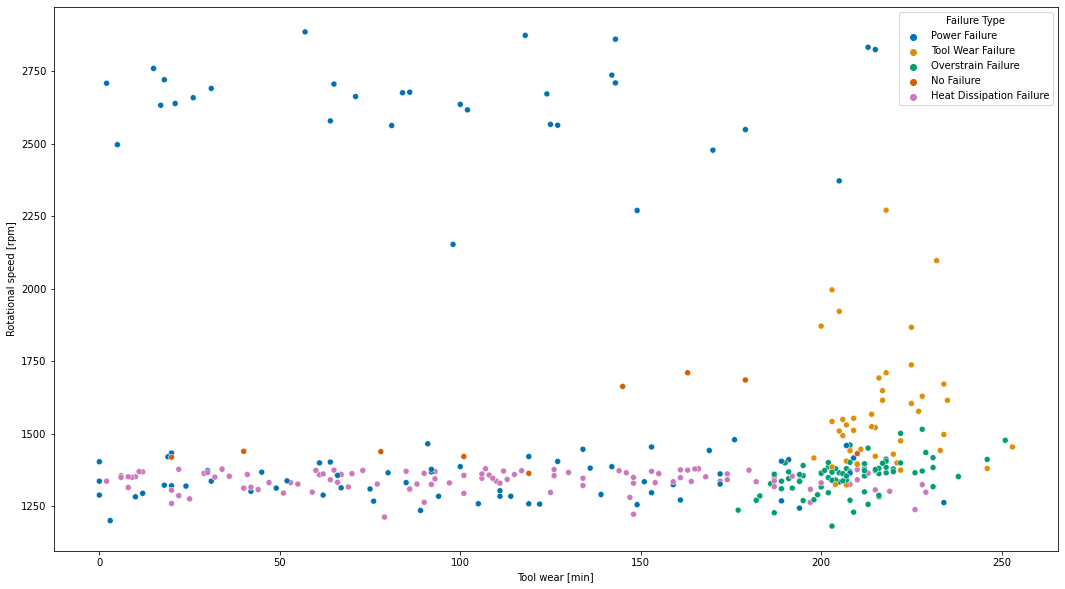

In [23]:
plt.figure(figsize=(18,10))
sb.scatterplot(data=dt_fail,x="Tool wear [min]",y='Rotational speed [rpm]',hue="Failure Type",palette = "colorblind")

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Torque [Nm]'>

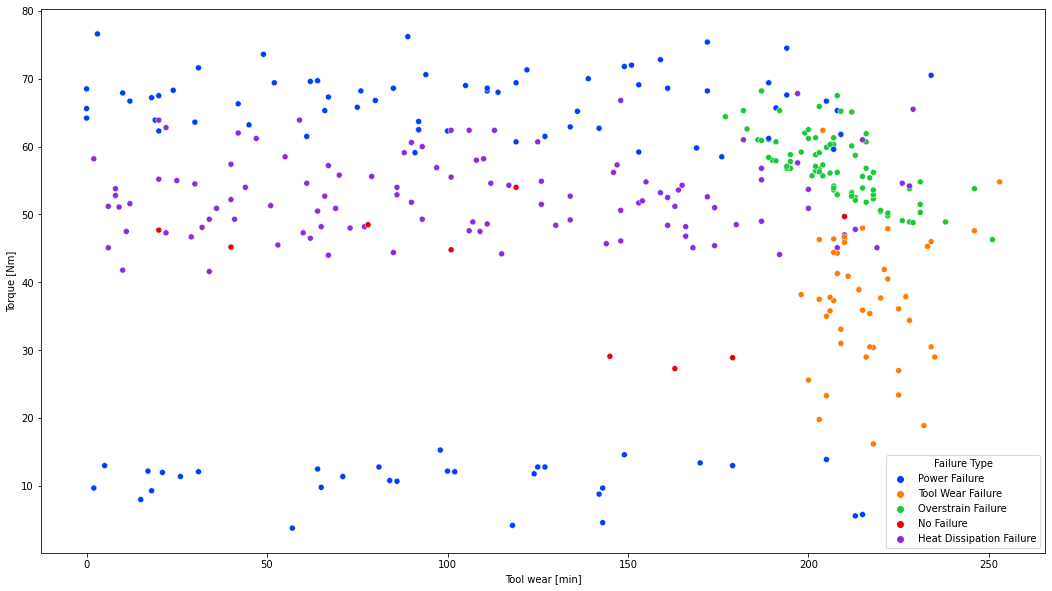

In [24]:
plt.figure(figsize=(18,10))
sb.scatterplot(data=dt_fail,x="Tool wear [min]",y='Torque [Nm]',hue="Failure Type",palette = "bright")

<AxesSubplot:>

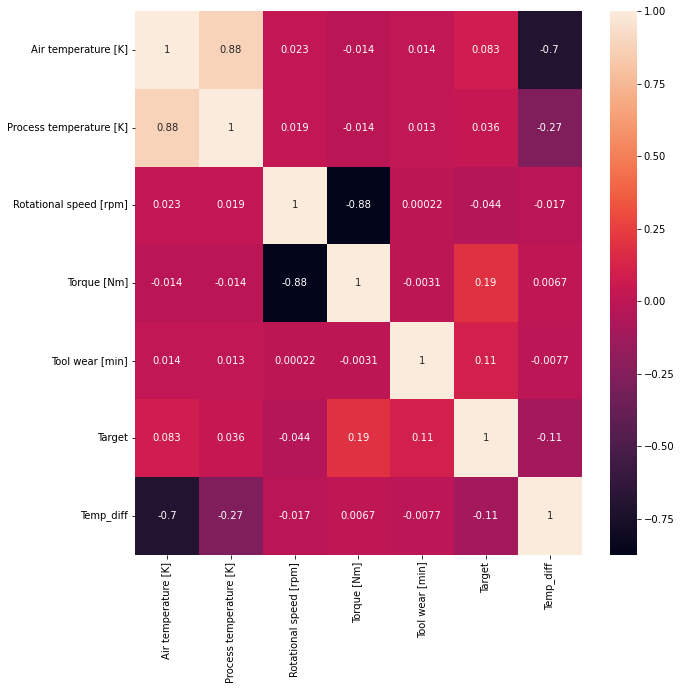

In [27]:
plt.figure(figsize=(10,10))
sb.heatmap(dat_n.corr(), annot=True)

In [28]:
cols = ['Rotational speed [rpm]', 'Torque [Nm]']
scaler = RobustScaler()
features_scaled = scaler.fit_transform(dat_n[cols])
features_scaled = pd.DataFrame(features_scaled, columns=cols)
dat_n.drop(cols, axis=1, inplace=True)
dat_n= pd.concat([dat_n,features_scaled], axis=1)
dat_n.head(5)

,Type,Air temperature [K],Process temperature [K],Tool wear [min],Target,Failure Type,Temp_diff,Rotational speed [rpm],Torque [Nm]
0,M,298.1,308.6,0,0,No Failure,10.5,0.253968,0.198529
1,L,298.2,308.7,3,0,No Failure,10.5,-0.502646,0.455882
2,L,298.1,308.5,5,0,No Failure,10.4,-0.026455,0.683824
3,L,298.2,308.6,7,0,No Failure,10.4,-0.370370,-0.044118
4,L,298.2,308.7,9,0,No Failure,10.5,-0.502646,-0.007353


In [29]:
cols1 = ['Air temperature [K]', 'Process temperature [K]', 'Tool wear [min]','Temp_diff']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(dat_n[cols1])
features_scaled = pd.DataFrame(features_scaled, columns=cols1)
dat_n.drop(cols1, axis=1, inplace=True)
dat_n = pd.concat([dat_n,features_scaled], axis=1)
dat_n.head(5)

,Type,Target,Failure Type,Rotational speed [rpm],Torque [Nm],Air temperature [K],Process temperature [K],Tool wear [min],Temp_diff
0,M,0,No Failure,0.253968,0.198529,0.304348,0.358025,0.000000,0.644444
1,L,0,No Failure,-0.502646,0.455882,0.315217,0.370370,0.011858,0.644444
2,L,0,No Failure,-0.026455,0.683824,0.304348,0.345679,0.019763,0.622222
3,L,0,No Failure,-0.370370,-0.044118,0.315217,0.358025,0.027668,0.622222
4,L,0,No Failure,-0.502646,-0.007353,0.315217,0.370370,0.035573,0.644444


In [30]:
col_ftype = dat_n['Failure Type'].unique().tolist()
col_ftype

['No Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Overstrain Failure',
 'Random Failures',
 'Heat Dissipation Failure']

In [31]:
ord_enc = OrdinalEncoder(categories=[['L', 'M', 'H'], col_ftype])
new_dat = ord_enc.fit_transform(dat_n[['Type', 'Failure Type']])
dat_n.drop(['Type', 'Failure Type'], axis=1, inplace=True)
new_dat = pd.DataFrame(new_dat, 
                      index=dat_n.index, 
                      columns=['Type', 'Failure Type'])
dat_n = pd.concat([dat_n, new_dat], axis=1)
dat_n.head(5)

,Target,Rotational speed [rpm],Torque [Nm],Air temperature [K],Process temperature [K],Tool wear [min],Temp_diff,Type,Failure Type
0,0,0.253968,0.198529,0.304348,0.358025,0.000000,0.644444,1.0,0.0
1,0,-0.502646,0.455882,0.315217,0.370370,0.011858,0.644444,0.0,0.0
2,0,-0.026455,0.683824,0.304348,0.345679,0.019763,0.622222,0.0,0.0
3,0,-0.370370,-0.044118,0.315217,0.358025,0.027668,0.622222,0.0,0.0
4,0,-0.502646,-0.007353,0.315217,0.370370,0.035573,0.644444,0.0,0.0


In [32]:
tr_failure = dat_n[dat_n['Target'] == 1]
irr_data = tr_failure[tr_failure ['Failure Type'] == 'No Failure']
dat_n.drop([1437,2749,4044,4684,5536,5941,6478,8506,9015], axis=0, inplace=True)

In [34]:
A = dat_n.drop(columns=["Failure Type","Type","Target"], axis=1)
B = dat_n["Target"]

In [35]:
x_train,x_test,Y_train,Y_test = train_test_split(A,B,test_size=0.25,random_state=12)

In [36]:
logreg = LogisticRegression()
model=logreg.fit(x_train,Y_train)
y_pred_lr = logreg.predict(x_test)

log_train = round(logreg.score(x_train, Y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr,Y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(Y_test,y_pred_lr))
print("--------------------------------------------------------")

Training Accuracy    : 97.0 %
Model Accuracy Score : 97.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2429
           1       0.74      0.20      0.32        69

    accuracy                           0.98      2498
   macro avg       0.86      0.60      0.65      2498
weighted avg       0.97      0.98      0.97      2498

--------------------------------------------------------


In [41]:
new_ob = [[-0.502646,0.455882,0.315217,0.370370,0.011858,0.644444]]
model.predict(new_ob)

array([0], dtype=int64)

In [42]:
model.predict_proba(new_ob)

array([[0.9981983, 0.0018017]])

In [43]:
logreg.classes_

array([0, 1], dtype=int64)

In [44]:
con = confusion_matrix(Y_test,y_pred_lr,labels=logreg.classes_)

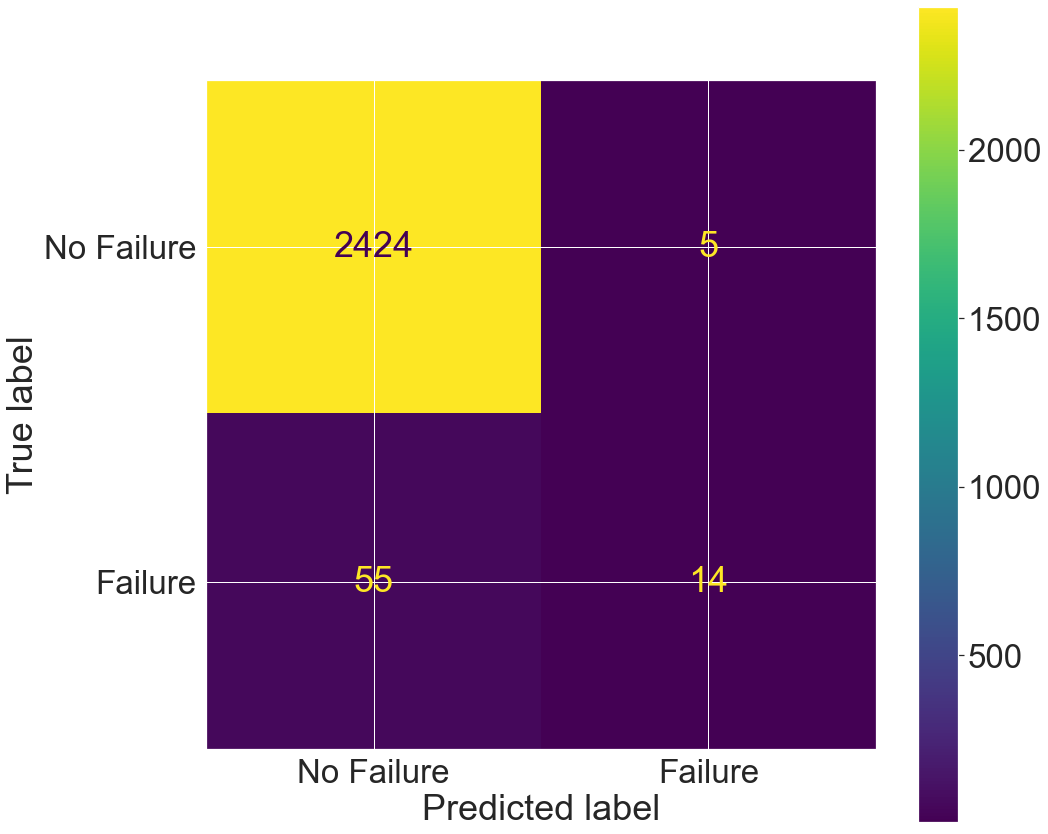

In [45]:
cmat = ConfusionMatrixDisplay(confusion_matrix=con, display_labels = ["No Failure","Failure"])
sb.set(font_scale=3.0)
fig, ax = plt.subplots(figsize=(15,15))
cmat.plot(ax=ax)

In [47]:
X = dat_n.drop(columns=["Failure Type","Type","Target"], axis=1)
Y = dat_n["Failure Type"]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=21)

In [49]:
rf = RandomForestClassifier(n_estimators=100)
model1=rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
sc=rf.score(X_train, y_train)

random_forest_train = round(sc * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2411
         1.0       0.87      0.80      0.83        25
         2.0       0.00      0.00      0.00        12
         3.0       0.55      0.38      0.44        16
         4.0       0.00      0.00      0.00         2
         5.0       0.97      0.91      0.94        32

    accuracy                           0.98      2498
   macro avg       0.56      0.51      0.53      2498
weighted avg       0.98      0.98      0.98      2498

--------------------------------------------------------


In [51]:
new_ob1 = [[-0.502646,0.455882,0.315217,0.370370,0.011858,0.644444]]
model1.predict(new_ob1)

array([0.])

In [52]:
model1.predict_proba(new_ob1)

array([[1., 0., 0., 0., 0., 0.]])

In [53]:
cm=confusion_matrix(y_test,y_pred,labels=rf.classes_)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No Failure'),
  Text(1, 0, 'Power Failure'),
  Text(2, 0, 'Tool Wear Failure'),
  Text(3, 0, 'Overstrain Failure'),
  Text(4, 0, 'Random Failures'),
  Text(5, 0, 'Heat Dissipation Failure')])

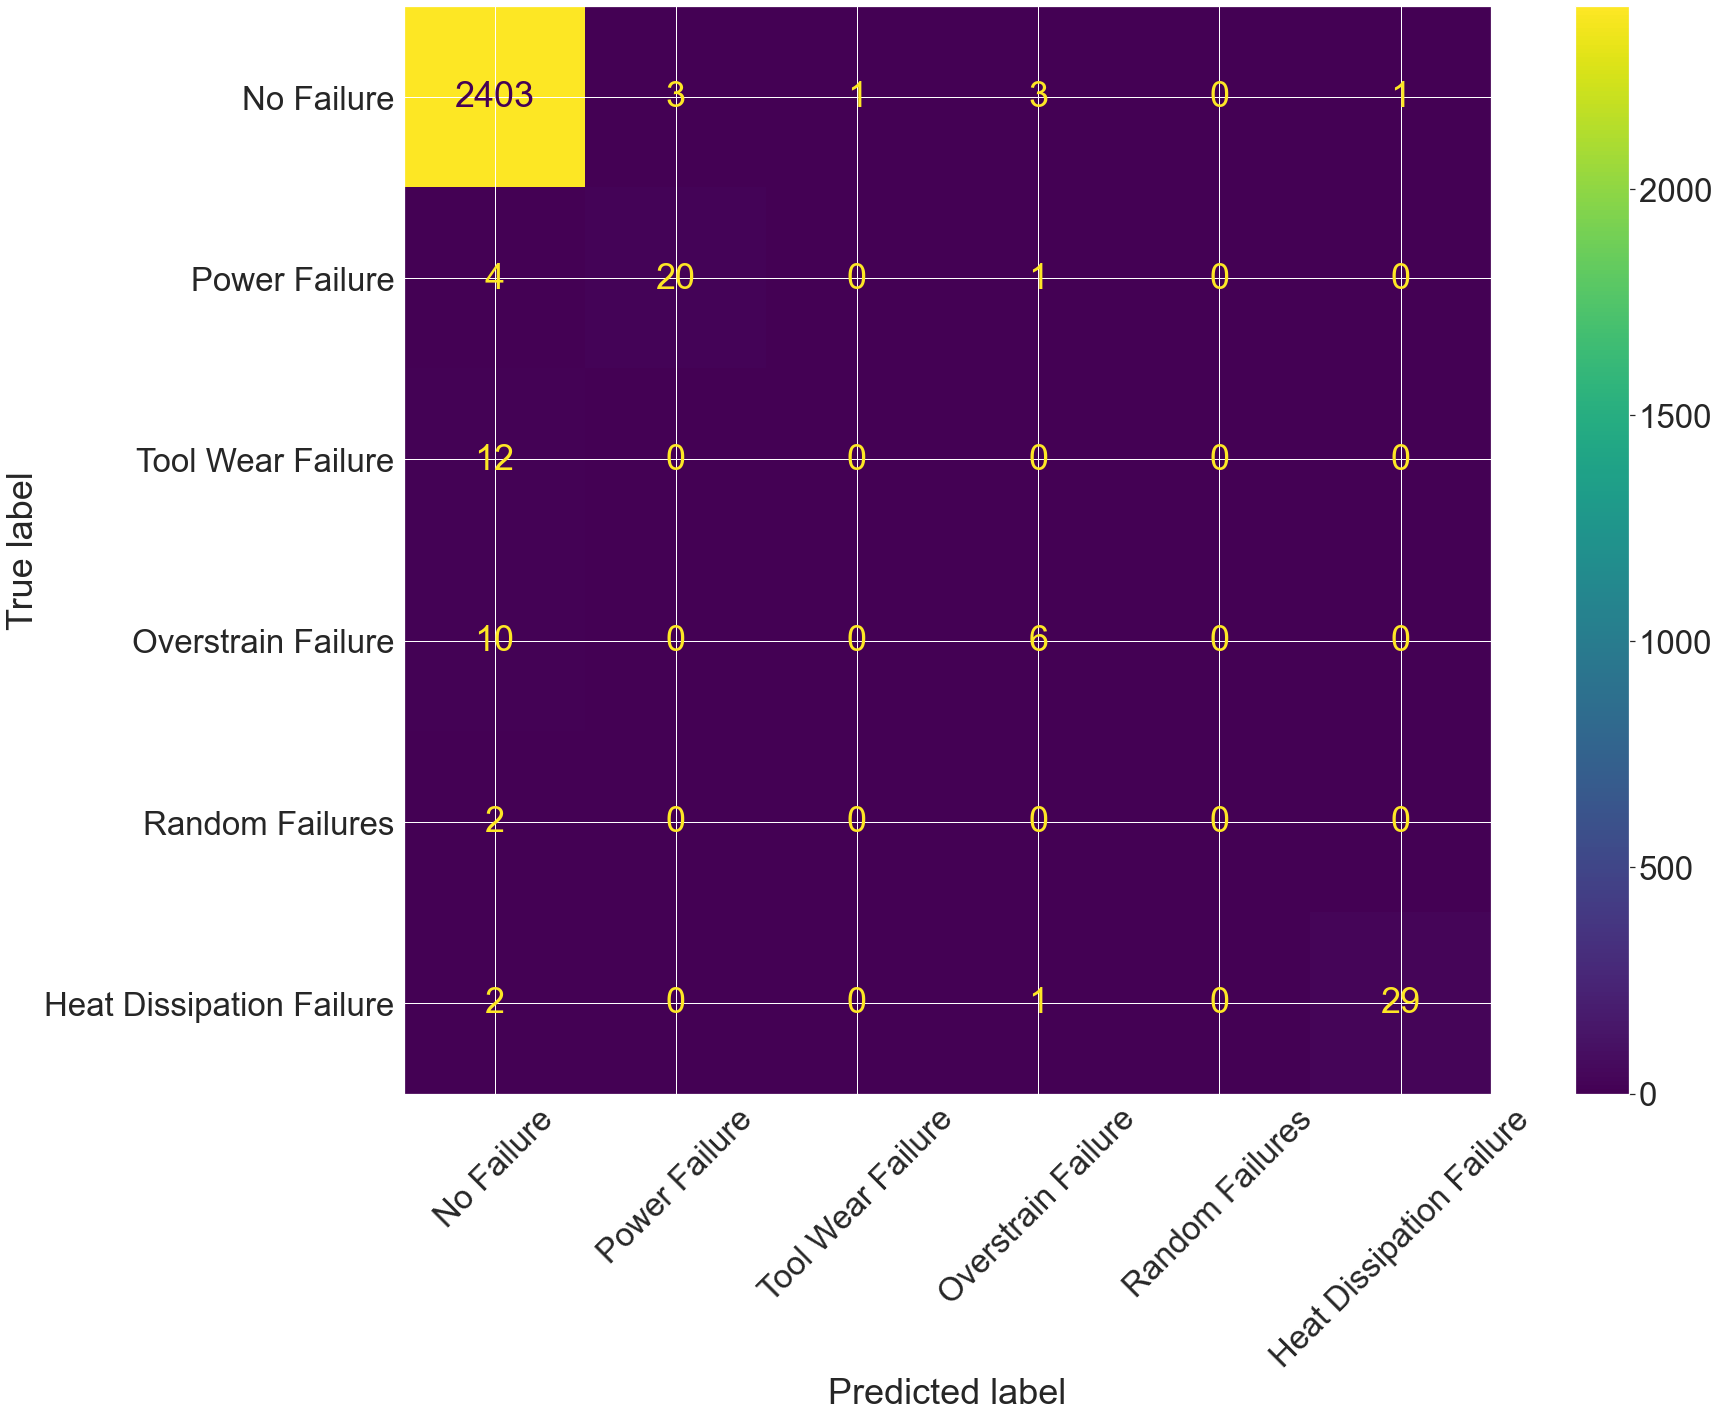

In [54]:
cp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['No Failure','Power Failure','Tool Wear Failure','Overstrain Failure','Random Failures','Heat Dissipation Failure'])
sb.set(font_scale=3.0)
fig, ax = plt.subplots(figsize=(30,20))
cp.plot(ax=ax)
plt.xticks(rotation=45)